In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv('./fiuba-trocafone-tp1-final-set/events.csv', dtype=types, low_memory=False)

In [3]:
df_events = df_events[["person",'timestamp','event','campaign_source','search_engine']]

In [4]:
df_events['is_new_session'] = np.where((df_events["event"] == "visited site"),True,False)

In [5]:
checkout_events = df_events.sort_values(by=['person','timestamp','is_new_session'], ascending=[True,True,False])\
        .loc[(df_events["event"] == "checkout") | (df_events["event"] == "ad campaign hit") \
             | (df_events["event"] == "visited site")]
checkout_events

,person,timestamp,event,campaign_source,search_engine,is_new_session
1,0004b0a2,2018-05-31 23:38:05,visited site,NaN,NaN,True
0,0004b0a2,2018-05-31 23:38:05,ad campaign hit,criteo,NaN,False
3,0004b0a2,2018-05-31 23:38:40,checkout,NaN,NaN,False
5,0006a21a,2018-05-29 13:29:26,visited site,NaN,NaN,True
6,0006a21a,2018-05-29 13:29:27,ad campaign hit,criteo,NaN,False
7,0006a21a,2018-05-29 13:29:35,checkout,NaN,NaN,False
9,000a54b2,2018-04-09 20:12:31,visited site,NaN,NaN,True
11,000a54b2,2018-04-09 20:12:31,ad campaign hit,google,NaN,False
16,000a54b2,2018-05-24 11:21:07,visited site,NaN,NaN,True
15,000a54b2,2018-05-24 11:21:07,ad campaign hit,google,NaN,False


In [6]:
session_id = (checkout_events["event"] == "visited site").cumsum()

checkout_events['session_id'] = session_id
checkout_events.head(10)

,person,timestamp,event,campaign_source,search_engine,is_new_session,session_id
1,0004b0a2,2018-05-31 23:38:05,visited site,NaN,NaN,True,1
0,0004b0a2,2018-05-31 23:38:05,ad campaign hit,criteo,NaN,False,1
3,0004b0a2,2018-05-31 23:38:40,checkout,NaN,NaN,False,1
5,0006a21a,2018-05-29 13:29:26,visited site,NaN,NaN,True,2
6,0006a21a,2018-05-29 13:29:27,ad campaign hit,criteo,NaN,False,2
7,0006a21a,2018-05-29 13:29:35,checkout,NaN,NaN,False,2
9,000a54b2,2018-04-09 20:12:31,visited site,NaN,NaN,True,3
11,000a54b2,2018-04-09 20:12:31,ad campaign hit,google,NaN,False,3
16,000a54b2,2018-05-24 11:21:07,visited site,NaN,NaN,True,4
15,000a54b2,2018-05-24 11:21:07,ad campaign hit,google,NaN,False,4


In [7]:
checkout_events['is_checkout'] = checkout_events['event'] == 'checkout'
checkouts_per_session = checkout_events.groupby(['session_id']).agg({'is_checkout': 'sum'})
checkouts_per_session

,is_checkout
session_id,
1,1.0
2,1.0
3,0.0
4,1.0
5,2.0
6,2.0
7,1.0
8,0.0
9,1.0


In [8]:
campaign_source_per_session = checkout_events[['event','session_id','campaign_source']]\
            .loc[(checkout_events["event"] == "ad campaign hit")].groupby(['session_id'])['campaign_source'].first()
campaign_source_per_session

session_id
1             criteo
2             criteo
3             google
4             google
7             google
9             google
10            criteo
12       FacebookAds
13             zanox
14            google
23            google
25            criteo
26            criteo
27            criteo
28            google
29            google
30          rtbhouse
32            google
34            google
35            google
36            google
37            criteo
38            google
39            google
41            google
43            google
44            google
45            google
46            google
47            google
            ...     
87337         google
87338         google
87339         google
87340         google
87341         google
87342         google
87349         google
87350         google
87351          zanox
87352         google
87353         google
87354         google
87355         google
87356         google
87357         google
87358         google
87

In [9]:
checkouts_and_campaign_source_per_session = checkouts_per_session\
    .join(campaign_source_per_session, lsuffix='session_id', rsuffix='session_id', )
checkouts_and_campaign_source_per_session.reset_index(inplace=True)
checkouts_and_campaign_source_per_session.columns = ['session_id','checkouts', 'campaign_source']
#checkouts_and_campaign_source_per_session = checkouts_and_campaign_source_per_session[checkouts_and_campaign_source_per_session['campaign_source'].isnull() == False]
#checkouts_and_campaign_source_per_session[checkouts_and_campaign_source_per_session['checkouts_qty'] == 0]

In [10]:
checkouts_qty_per_campaign = checkouts_and_campaign_source_per_session\
    .fillna('Without campaign')\
    .groupby(['campaign_source','checkouts'])\
    .agg({'session_id': 'count'})
checkouts_qty_per_campaign.iloc

In [11]:
checkouts_qty_per_campaign.reset_index(inplace=True)
checkouts_qty_per_campaign.columns = ['campaign_source', 'checkouts', 'sessions']

In [17]:
checkouts_qty_per_campaign[(checkouts_qty_per_campaign['campaign_source'] == 'FacebookAds')\
   | (checkouts_qty_per_campaign['campaign_source'] == 'google')\
   | (checkouts_qty_per_campaign['campaign_source'] == 'criteo')\
   | (checkouts_qty_per_campaign['campaign_source'] == 'Without campaign')\
   | (checkouts_qty_per_campaign['campaign_source'] == 'rtbhouse')]

,campaign_source,checkouts,sessions
3,FacebookAds,0.0,233
4,FacebookAds,1.0,257
5,FacebookAds,2.0,19
6,FacebookAds,3.0,2
7,FacebookAds,4.0,1
8,FacebookAds,5.0,1
12,Without campaign,0.0,27765
13,Without campaign,1.0,10083
14,Without campaign,2.0,541
15,Without campaign,3.0,112


In [12]:
df_aux = checkouts_qty_per_campaign\
    .groupby(['campaign_source'])\
    .agg({'checkouts': 'sum', 'sessions':'sum'})
df_aux['mean'] = (df_aux['checkouts']/df_aux['sessions'])*100
df_aux = df_aux[df_aux['sessions'] > 300]

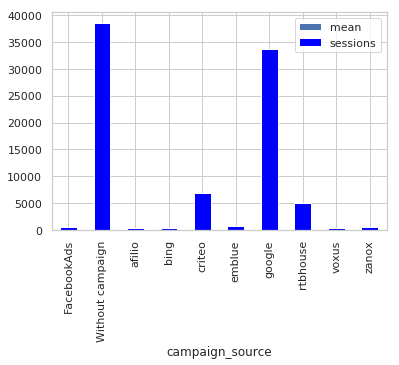

In [13]:
# df_aux['log_sessions'] = np.log(df_aux['sessions']+1)
# df_aux['log_checkouts'] = np.log(df_aux['checkouts']+1)
ax = df_aux.plot(kind='bar', stacked=True, y='mean');
df_aux.plot(kind='bar', stacked=True, y='sessions', ax=ax, color='Blue');
# df_aux

In [14]:
df_aux

,checkouts,sessions,mean
campaign_source,,,
FacebookAds,15.0,513,2.923977
Without campaign,71.0,38574,0.184062
afilio,15.0,341,4.398827
bing,13.0,302,4.304636
criteo,23.0,6852,0.335668
emblue,10.0,804,1.243781
google,96.0,33670,0.285120
rtbhouse,17.0,5045,0.336967
voxus,10.0,351,2.849003
